<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

## 1. Problem Statement

We are a group of academia specialists, hired by institutions in the US to identify states with growth potential in private tuition to secure entry to College based on:
    1. ACT/SAT Subject scores

### Datasets

Listed below are the datasets included in the [`data`](../data/) folder for this project. 

* [`act_2017.csv`](../data/act_2017.csv): 2017 ACT Scores by State ([source](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows))
* [`act_2018.csv`](../data/act_2018.csv): 2018 ACT Scores by State ([source](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows))
* [`act_2019.csv`](../data/act_2019.csv): 2019 ACT Scores by State ([source](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows))
* [`sat_2017.csv`](../data/sat_2017.csv): 2017 SAT Scores by State ([source](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/))
* [`sat_2018.csv`](../data/sat_2018.csv): 2018 SAT Scores by State ([source](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/))
* [`sat_2019.csv`](../data/sat_2019.csv): 2019 SAT Scores by State ([source](https://blog.prepscholar.com/average-sat-scores-by-state-most-recent))


### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!

In [1]:
# Code:

def my_mean(sample):
     return sum(sample) / len(sample)

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [51]:
# Code: 

def stdev_of_list(data, ddof=0):
    n = len(data)
    mean = sum(data) / n
    var = sum((x - mean) ** 2 for x in data) / (n - ddof)
    std_dev = math.sqrt(var)
    return std_dev
 

3. Data cleaning function:
    
    Write a function that takes in a string that is a number and a percent symbol (ex. '50%', '30.5%', etc.) and converts this to a float that is the decimal approximation of the percent. For example, inputting '50%' in your function should return 0.5, '30.5%' should return 0.305, etc. Make sure to test your function to make sure it works!

In [52]:
def percent_to_int(x):
    return float(x.strip('%'))

## 2. Data Cleaning - Credits to Song Yi

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
act_2017 = pd.read_csv('./data/act_2017.csv')
act_2018 = pd.read_csv('./data/act_2018.csv')
act_2019 = pd.read_csv('./data/act_2019.csv')
sat_2017 = pd.read_csv('./data/sat_2017.csv')
sat_2018 = pd.read_csv('./data/sat_2018.csv')
sat_2019 = pd.read_csv('./data/sat_2019.csv')
trended_gdp_per_capita_by_state = pd.read_csv('./data/download.csv', header=4)

In [55]:
#Function - Change percentage (object) to int/float
def percent_to_int(x):
    return int(x.strip('%'))

In [56]:
# Dropping rows that have missing value
trended_gdp_per_capita_by_state.dropna(inplace=True)
# Dropping the column 'GeoFips' as it is irrelevant
trended_gdp_per_capita_by_state.drop('GeoFips', axis=1, inplace=True)
# Removing * from Alaska
trended_gdp_per_capita_by_state.at[2, 'GeoName'] = 'Alaska'
# Removing * from Hawaii
trended_gdp_per_capita_by_state.at[12, 'GeoName'] = 'Hawaii'

In [57]:
# Renaming the columns in GDP per capita by state
trended_gdp_per_capita_by_state.rename(columns={'GeoName':'State',
                                               '2017': 'GDP Per Capita (2017)',
                                               '2018': 'GDP Per Capita (2018)',
                                               '2019': 'GDP Per Capita (2019)'}, 
                                                inplace=True)
trended_gdp_per_capita_by_state.head()

,State,GDP Per Capita (2017),GDP Per Capita (2018),GDP Per Capita (2019)
0,United States,51573.0,53817.0,55724.0
1,Alabama,40252.0,41607.0,43157.0
2,Alaska,57278.0,59783.0,61639.0
3,Arizona,43301.0,45299.0,47242.0
4,Arkansas,42056.0,43661.0,45037.0


In [58]:
# Renaming 'United States' to 'National' so that we can merge the dataframes
trended_gdp_per_capita_by_state.at[0, 'State'] = 'National'
# Sorting the States by alphabetical order
trended_gdp_per_capita_by_state.sort_values('State', axis=0).head()

,State,GDP Per Capita (2017),GDP Per Capita (2018),GDP Per Capita (2019)
1,Alabama,40252.0,41607.0,43157.0
2,Alaska,57278.0,59783.0,61639.0
3,Arizona,43301.0,45299.0,47242.0
4,Arkansas,42056.0,43661.0,45037.0
5,California,58813.0,61509.0,64333.0


In [59]:
# Merging act_2017 with trended GDP per capita by state
act_2017 = act_2017.merge(trended_gdp_per_capita_by_state, how='left', on='State')
# Change value in row 51, Composite (2017) (ACT) to 20.2x
act_2017 = act_2017.replace('20.2x',20.02)
act_2017 = act_2017.replace(2.3, 23.2)
#replace object values in composite column with float values
act_2017["Composite"] = list(map(lambda x: float(x), act_2017['Composite']))
# Dropping GDP per Capita information that is not relevant for the particular year
act_2017.drop(labels=['GDP Per Capita (2018)', 'GDP Per Capita (2019)'], axis=1, inplace=True)
act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite,GDP Per Capita (2017)
0,National,60%,20.3,20.7,21.4,21.0,21.0,51573.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2,40252.0
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8,57278.0
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7,43301.0
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4,42056.0


In [60]:
# Notice that in row 8, the letter 'c' in 'District of columbia' is lower-case]
act_2018.at[8,'State'] = 'District of Columbia'
# Merging act_2018 with trended GDP per capita by state
act_2018 = act_2018.merge(trended_gdp_per_capita_by_state, how='left', on='State')
# Dropping GDP per Capita information that is not relevant for the particular year
act_2018.drop(labels=['GDP Per Capita (2017)', 'GDP Per Capita (2019)'], axis=1, inplace=True)
# Merging act_2019 with trended GDP per capita by state
act_2019 = act_2019.merge(trended_gdp_per_capita_by_state, how='left', on='State')
# Dropping GDP per Capita information that is not relevant for the particular year
act_2019.drop(labels=['GDP Per Capita (2017)', 'GDP Per Capita (2018)'], axis=1, inplace=True)
act_2018.head()

,State,Participation,Composite,GDP Per Capita (2018)
0,Alabama,100%,19.1,41607.0
1,Alaska,33%,20.8,59783.0
2,Arizona,66%,19.2,45299.0
3,Arkansas,100%,19.4,43661.0
4,California,27%,22.7,61509.0


In [61]:
act_2019.head()

,State,Participation,Composite,GDP Per Capita (2019)
0,Alabama,100%,18.9,43157.0
1,Alaska,38%,20.1,61639.0
2,Arizona,73%,19.0,47242.0
3,Arkansas,100%,19.3,45037.0
4,California,23%,22.6,64333.0


In [62]:
# Changing row 20, Maryland Math scores to be Total (2017) (SAT) - Evidence-Based Reading and Writing
sat_2017.at[20, 'Math'] = 1060 - 536
# Merging sat_2017 with trended GDP per capita by state
sat_2017 = sat_2017.merge(trended_gdp_per_capita_by_state, how='left', on='State')
# Dropping GDP per Capita information that is not relevant for the particular year
sat_2017.drop(labels=['GDP Per Capita (2018)', 'GDP Per Capita (2019)'], axis=1, inplace=True)
sat_2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total,GDP Per Capita (2017)
0,Alabama,5%,593,572,1165,40252.0
1,Alaska,38%,547,533,1080,57278.0
2,Arizona,30%,563,553,1116,43301.0
3,Arkansas,3%,614,594,1208,42056.0
4,California,53%,531,524,1055,58813.0


In [63]:
# Merging sat_2018 with trended GDP per capita by state
sat_2018 = sat_2018.merge(trended_gdp_per_capita_by_state, how='left', on='State')
# Dropping GDP per Capita information that is not relevant for the particular year
sat_2018.drop(labels=['GDP Per Capita (2017)', 'GDP Per Capita (2019)'], axis=1, inplace=True)
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total,GDP Per Capita (2018)
0,Alabama,6%,595,571,1166,41607.0
1,Alaska,43%,562,544,1106,59783.0
2,Arizona,29%,577,572,1149,45299.0
3,Arkansas,5%,592,576,1169,43661.0
4,California,60%,540,536,1076,61509.0


In [64]:
# Merging sat_2019 with trended GDP per capita by state
sat_2019 = sat_2019.merge(trended_gdp_per_capita_by_state, how='left', on='State')
# Dropping GDP per Capita information that is not relevant for the particular year
sat_2019.drop(labels=['GDP Per Capita (2017)', 'GDP Per Capita (2018)'], axis=1, inplace=True)
sat_2019.head()

,State,Participation Rate,EBRW,Math,Total,GDP Per Capita (2019)
0,Alabama,7%,583,560,1143,43157.0
1,Alaska,41%,556,541,1097,61639.0
2,Arizona,31%,569,565,1134,47242.0
3,Arkansas,6%,582,559,1141,45037.0
4,California,63%,534,531,1065,64333.0


In [65]:
act_2017.dropna(inplace=True)
act_2018.dropna(inplace=True)
act_2019.dropna(inplace=True)
sat_2017.dropna(inplace=True)
sat_2018.dropna(inplace=True)
sat_2019.dropna(inplace=True)

In [66]:
# Converting the Participation column to integer
act_2017['Participation'] = act_2017['Participation'].apply(percent_to_int)
act_2018['Participation'] = act_2018['Participation'].apply(percent_to_int)
act_2019['Participation'] = act_2019['Participation'].apply(percent_to_int)
sat_2017['Participation'] = sat_2017['Participation'].apply(percent_to_int)
sat_2018['Participation'] = sat_2018['Participation'].apply(percent_to_int)
sat_2019['Participation Rate'] = sat_2019['Participation Rate'].apply(percent_to_int)

In [67]:
#Rename columns to denote the year before merging the dataframes for ACT
act_2017.rename(columns = {'Participation': 'Participation (2017) (ACT)',
                          'Composite': 'Composite (2017) (ACT)'},
                          inplace=True)

act_2018.rename(columns = {'Participation': 'Participation (2018) (ACT)',
                          'Composite': 'Composite (2018) (ACT)'},
                          inplace=True)

act_2019.rename(columns = {'Participation': 'Participation (2019) (ACT)',
                          'Composite': 'Composite (2019) (ACT)'},
                          inplace=True)

In [68]:
#Merging all ACT files
act_merged = pd.merge(act_2017, act_2018, on='State').drop(['English', 'Math', 'Reading', 'Science'], axis=1)
act_merged = pd.merge(act_merged, act_2019, on='State')
act_merged = act_merged[['State','Participation (2017) (ACT)', 'Participation (2018) (ACT)', 'Participation (2019) (ACT)',
                        'Composite (2017) (ACT)', 'Composite (2018) (ACT)', 'Composite (2019) (ACT)',
                        'GDP Per Capita (2017)', 'GDP Per Capita (2018)', 'GDP Per Capita (2019)']]
act_merged.head()

,State,Participation (2017) (ACT),Participation (2018) (ACT),Participation (2019) (ACT),Composite (2017) (ACT),Composite (2018) (ACT),Composite (2019) (ACT),GDP Per Capita (2017),GDP Per Capita (2018),GDP Per Capita (2019)
0,Alabama,100,100,100,19.2,19.1,18.9,40252.0,41607.0,43157.0
1,Alaska,65,33,38,19.8,20.8,20.1,57278.0,59783.0,61639.0
2,Arizona,62,66,73,19.7,19.2,19.0,43301.0,45299.0,47242.0
3,Arkansas,100,100,100,19.4,19.4,19.3,42056.0,43661.0,45037.0
4,California,31,27,23,22.8,22.7,22.6,58813.0,61509.0,64333.0


In [69]:
#Rename columns to denote the year before merging the dataframes for SAT
sat_2017.rename(columns={'Participation': 'Participation (2017) (SAT)',
                        'Total': 'Total (2017) (SAT)'},
                         inplace=True)

sat_2018.rename(columns={'Participation': 'Participation (2018) (SAT)',
                        'Total': 'Total (2018) (SAT)'},
                         inplace=True)

sat_2019.rename(columns={'Participation Rate': 'Participation (2019) (SAT)',
                        'Total': 'Total (2019) (SAT)'},
                         inplace=True)

In [70]:
#Merging all SAT files
sat_merged = pd.merge(sat_2017, sat_2018, on='State')
sat_merged = pd.merge(sat_merged, sat_2019, on='State').drop(['Evidence-Based Reading and Writing_x',
                                                             'Math_x',
                                                             'Evidence-Based Reading and Writing_y',
                                                             'Math_y',
                                                             'EBRW',
                                                             'Math'], axis=1)

sat_merged = sat_merged[['State',
                        'Participation (2017) (SAT)', 'Participation (2018) (SAT)', 'Participation (2019) (SAT)',
                        'Total (2017) (SAT)', 'Total (2018) (SAT)', 'Total (2019) (SAT)']]
sat_merged.head()

,State,Participation (2017) (SAT),Participation (2018) (SAT),Participation (2019) (SAT),Total (2017) (SAT),Total (2018) (SAT),Total (2019) (SAT)
0,Alabama,5,6,7,1165,1166,1143
1,Alaska,38,43,41,1080,1106,1097
2,Arizona,30,29,31,1116,1149,1134
3,Arkansas,3,5,6,1208,1169,1141
4,California,53,60,63,1055,1076,1065


In [71]:
#Merging SAT and ACT, renaming  and re-ordering columns
act_sat_merged = pd.merge(act_merged, sat_merged, on='State')
act_sat_merged.rename(columns = {'Participation (2017) (ACT)': 'Rate_2017_act',
                                'Participation (2018) (ACT)': 'Rate_2018_act',
                                'Participation (2019) (ACT)': 'Rate_2019_act',
                                'Composite (2017) (ACT)': 'Total_2017_act',
                                'Composite (2018) (ACT)': 'Total_2018_act',
                                'Composite (2019) (ACT)': 'Total_2019_act',
                                'GDP Per Capita (2017)': 'GDP_2017', 
                                'GDP Per Capita (2018)': 'GDP_2018',
                                'GDP Per Capita (2019)': 'GDP_2019',
                                'Participation (2017) (SAT)': 'Rate_2017_sat',
                                'Participation (2018) (SAT)': 'Rate_2018_sat',
                                'Participation (2019) (SAT)': 'Rate_2019_sat',
                                'Total (2017) (SAT)': 'Total_2017_sat',
                                'Total (2018) (SAT)': 'Total_2018_sat',
                                'Total (2019) (SAT)': 'Total_2019_sat'},
                                 inplace=True)

act_sat_merged = act_sat_merged[['State',
                                'Rate_2017_act', 
                                'Rate_2018_act',
                                'Rate_2019_act',
                                'Rate_2017_sat',
                                'Rate_2018_sat',
                                'Rate_2019_sat',
                                'Total_2017_act',
                                'Total_2018_act',
                                'Total_2019_act',
                                'Total_2017_sat',
                                'Total_2018_sat',
                                'Total_2019_sat',
                                'GDP_2017',
                                'GDP_2018',
                                'GDP_2019']]

act_sat_merged.head()

,State,Rate_2017_act,Rate_2018_act,Rate_2019_act,Rate_2017_sat,Rate_2018_sat,Rate_2019_sat,Total_2017_act,Total_2018_act,Total_2019_act,Total_2017_sat,Total_2018_sat,Total_2019_sat,GDP_2017,GDP_2018,GDP_2019
0,Alabama,100,100,100,5,6,7,19.2,19.1,18.9,1165,1166,1143,40252.0,41607.0,43157.0
1,Alaska,65,33,38,38,43,41,19.8,20.8,20.1,1080,1106,1097,57278.0,59783.0,61639.0
2,Arizona,62,66,73,30,29,31,19.7,19.2,19.0,1116,1149,1134,43301.0,45299.0,47242.0
3,Arkansas,100,100,100,3,5,6,19.4,19.4,19.3,1208,1169,1141,42056.0,43661.0,45037.0
4,California,31,27,23,53,60,63,22.8,22.7,22.6,1055,1076,1065,58813.0,61509.0,64333.0


In [72]:
#Averaging GDP for 2017,2018 and 2019
act_sat_merged['Mean_GDP'] = np.average([act_sat_merged['GDP_2017'],
                                         act_sat_merged['GDP_2018'],
                                         act_sat_merged['GDP_2019']],
                                         axis=0)
act_sat_merged['Mean_GDP'] = round(act_sat_merged['Mean_GDP'],0)

act_sat_merged.head()

,State,Rate_2017_act,Rate_2018_act,Rate_2019_act,Rate_2017_sat,Rate_2018_sat,Rate_2019_sat,Total_2017_act,Total_2018_act,Total_2019_act,Total_2017_sat,Total_2018_sat,Total_2019_sat,GDP_2017,GDP_2018,GDP_2019,Mean_GDP
0,Alabama,100,100,100,5,6,7,19.2,19.1,18.9,1165,1166,1143,40252.0,41607.0,43157.0,41672.0
1,Alaska,65,33,38,38,43,41,19.8,20.8,20.1,1080,1106,1097,57278.0,59783.0,61639.0,59567.0
2,Arizona,62,66,73,30,29,31,19.7,19.2,19.0,1116,1149,1134,43301.0,45299.0,47242.0,45281.0
3,Arkansas,100,100,100,3,5,6,19.4,19.4,19.3,1208,1169,1141,42056.0,43661.0,45037.0,43585.0
4,California,31,27,23,53,60,63,22.8,22.7,22.6,1055,1076,1065,58813.0,61509.0,64333.0,61552.0


In [73]:
#Averaging ACT and SAT participation rates for 2017,2018 and 2019
#Rounding the Average ACT and SAT participation rates to 0 decminal places
act_sat_merged['Mean_Rate_ACT'] = np.average([act_sat_merged['Rate_2017_act'],
                                             act_sat_merged['Rate_2018_act'],
                                             act_sat_merged['Rate_2019_act']],
                                             axis=0)

act_sat_merged['Mean_Rate_SAT'] = np.average([act_sat_merged['Rate_2017_sat'],
                                             act_sat_merged['Rate_2018_sat'],
                                             act_sat_merged['Rate_2019_sat']],
                                             axis=0)

act_sat_merged['Mean_Rate_ACT'] = round(act_sat_merged['Mean_Rate_ACT'],0)
act_sat_merged['Mean_Rate_SAT'] = round(act_sat_merged['Mean_Rate_SAT'],0)

act_sat_merged.head()

,State,Rate_2017_act,Rate_2018_act,Rate_2019_act,Rate_2017_sat,Rate_2018_sat,Rate_2019_sat,Total_2017_act,Total_2018_act,Total_2019_act,Total_2017_sat,Total_2018_sat,Total_2019_sat,GDP_2017,GDP_2018,GDP_2019,Mean_GDP,Mean_Rate_ACT,Mean_Rate_SAT
0,Alabama,100,100,100,5,6,7,19.2,19.1,18.9,1165,1166,1143,40252.0,41607.0,43157.0,41672.0,100.0,6.0
1,Alaska,65,33,38,38,43,41,19.8,20.8,20.1,1080,1106,1097,57278.0,59783.0,61639.0,59567.0,45.0,41.0
2,Arizona,62,66,73,30,29,31,19.7,19.2,19.0,1116,1149,1134,43301.0,45299.0,47242.0,45281.0,67.0,30.0
3,Arkansas,100,100,100,3,5,6,19.4,19.4,19.3,1208,1169,1141,42056.0,43661.0,45037.0,43585.0,100.0,5.0
4,California,31,27,23,53,60,63,22.8,22.7,22.6,1055,1076,1065,58813.0,61509.0,64333.0,61552.0,27.0,59.0


In [74]:
#Dropping 1 of the duplicated rows which have 'Maine' in their state
act_sat_merged.drop(20, axis=0, inplace=True)
act_sat_merged.reset_index(inplace=True)
act_sat_merged.drop('index',axis=1, inplace=True)
act_sat_merged.head() 


,State,Rate_2017_act,Rate_2018_act,Rate_2019_act,Rate_2017_sat,Rate_2018_sat,Rate_2019_sat,Total_2017_act,Total_2018_act,Total_2019_act,Total_2017_sat,Total_2018_sat,Total_2019_sat,GDP_2017,GDP_2018,GDP_2019,Mean_GDP,Mean_Rate_ACT,Mean_Rate_SAT
0,Alabama,100,100,100,5,6,7,19.2,19.1,18.9,1165,1166,1143,40252.0,41607.0,43157.0,41672.0,100.0,6.0
1,Alaska,65,33,38,38,43,41,19.8,20.8,20.1,1080,1106,1097,57278.0,59783.0,61639.0,59567.0,45.0,41.0
2,Arizona,62,66,73,30,29,31,19.7,19.2,19.0,1116,1149,1134,43301.0,45299.0,47242.0,45281.0,67.0,30.0
3,Arkansas,100,100,100,3,5,6,19.4,19.4,19.3,1208,1169,1141,42056.0,43661.0,45037.0,43585.0,100.0,5.0
4,California,31,27,23,53,60,63,22.8,22.7,22.6,1055,1076,1065,58813.0,61509.0,64333.0,61552.0,27.0,59.0


In [75]:
# Inserting 2 columns to depict states that mandate ACT and SAT
state_req_act = ['Alabama',
                 'Hawaii',
                 'Idaho',
                 'Kentucky',
                 'Louisiana',
                 'Mississippi',
                 'Missouri',
                 'Montana',
                 'Nebraska',
                 'Nevada',
                 'North Carolina',
                 'North Dakota',
                 'Ohio',
                 'South Carolina',
                 'Tennessee',
                 'Utah',
                 'Wisconsin',
                 'Wyoming']

state_req_sat = ['Colorado',
                 'Connecticut',
                 'Delaware',
                 'District of Columbia',
                 'Idaho',
                 'Illinois',
                 'Maine',
                 'Michigan',
                 'New Hampshire',
                 'Ohio',
                 'Tennessee']

act_sat_merged['Req_ACT'] = act_sat_merged['State'].apply(lambda x: 1 if x in state_req_act else 0)
act_sat_merged['Req_SAT'] = act_sat_merged['State'].apply(lambda x: 1 if x in state_req_sat else 0)
act_sat_merged.head()

,State,Rate_2017_act,Rate_2018_act,Rate_2019_act,Rate_2017_sat,Rate_2018_sat,Rate_2019_sat,Total_2017_act,Total_2018_act,Total_2019_act,...,Total_2018_sat,Total_2019_sat,GDP_2017,GDP_2018,GDP_2019,Mean_GDP,Mean_Rate_ACT,Mean_Rate_SAT,Req_ACT,Req_SAT
0,Alabama,100,100,100,5,6,7,19.2,19.1,18.9,...,1166,1143,40252.0,41607.0,43157.0,41672.0,100.0,6.0,1,0
1,Alaska,65,33,38,38,43,41,19.8,20.8,20.1,...,1106,1097,57278.0,59783.0,61639.0,59567.0,45.0,41.0,0,0
2,Arizona,62,66,73,30,29,31,19.7,19.2,19.0,...,1149,1134,43301.0,45299.0,47242.0,45281.0,67.0,30.0,0,0
3,Arkansas,100,100,100,3,5,6,19.4,19.4,19.3,...,1169,1141,42056.0,43661.0,45037.0,43585.0,100.0,5.0,0,0
4,California,31,27,23,53,60,63,22.8,22.7,22.6,...,1076,1065,58813.0,61509.0,64333.0,61552.0,27.0,59.0,0,0


In [76]:
#Separating merged file into SAT and ACT files
sat_merged = act_sat_merged[['State',
                            'Rate_2017_sat',
                            'Rate_2018_sat',
                            'Rate_2019_sat',
                            'Total_2017_sat',
                            'Total_2018_sat',
                            'Total_2019_sat',
                            'GDP_2017',
                            'GDP_2018',
                            'GDP_2019',
                            'Mean_GDP',
                            'Mean_Rate_SAT',
                            'Req_SAT']]
sat_merged.head()

,State,Rate_2017_sat,Rate_2018_sat,Rate_2019_sat,Total_2017_sat,Total_2018_sat,Total_2019_sat,GDP_2017,GDP_2018,GDP_2019,Mean_GDP,Mean_Rate_SAT,Req_SAT
0,Alabama,5,6,7,1165,1166,1143,40252.0,41607.0,43157.0,41672.0,6.0,0
1,Alaska,38,43,41,1080,1106,1097,57278.0,59783.0,61639.0,59567.0,41.0,0
2,Arizona,30,29,31,1116,1149,1134,43301.0,45299.0,47242.0,45281.0,30.0,0
3,Arkansas,3,5,6,1208,1169,1141,42056.0,43661.0,45037.0,43585.0,5.0,0
4,California,53,60,63,1055,1076,1065,58813.0,61509.0,64333.0,61552.0,59.0,0


In [77]:
#Separating merged file into SAT and ACT files
act_merged = act_sat_merged[['State',
                            'Rate_2017_act', 
                            'Rate_2018_act',
                            'Rate_2019_act',
                            'Total_2017_act',
                            'Total_2018_act',
                            'Total_2019_act',
                            'GDP_2017',
                            'GDP_2018',
                            'GDP_2019',
                            'Mean_GDP',
                            'Mean_Rate_ACT',
                            'Req_ACT']]
act_merged.head()

,State,Rate_2017_act,Rate_2018_act,Rate_2019_act,Total_2017_act,Total_2018_act,Total_2019_act,GDP_2017,GDP_2018,GDP_2019,Mean_GDP,Mean_Rate_ACT,Req_ACT
0,Alabama,100,100,100,19.2,19.1,18.9,40252.0,41607.0,43157.0,41672.0,100.0,1
1,Alaska,65,33,38,19.8,20.8,20.1,57278.0,59783.0,61639.0,59567.0,45.0,0
2,Arizona,62,66,73,19.7,19.2,19.0,43301.0,45299.0,47242.0,45281.0,67.0,0
3,Arkansas,100,100,100,19.4,19.4,19.3,42056.0,43661.0,45037.0,43585.0,100.0,0
4,California,31,27,23,22.8,22.7,22.6,58813.0,61509.0,64333.0,61552.0,27.0,0


## 3. Analysis on ACT/SAT scores by subjects

We will analyse which are the potential states to be targeted by private tuition based on ACT/SAT's subject scores.

we can further break down into the subjects and narrow down to a few potential states to start off their business with. SAT includes only two subjects, Evidence-based Reading and Writing (EBRW) and Math, while ACT included subjects such as English, Reading, Math and Science. Based on the subjects, we will narrow it down to the top 5 least scored states for each subject for private tuition centres which only want to focus on a few subjects instead of all. Finally, we will also make recommendation for potential states for tuition centres which want to have a more well rounded tuition offered for all subjects.

### Extra data cleaning

In [78]:
act_2017 = act_2017[1:]
act_2017.reset_index(drop=True)
#drop Maine as it is double counted 
act_2018 = act_2018.drop([19])
act_2018.reset_index(drop=True)
#drop National
act_2019 = act_2019.drop([51])
act_2019.reset_index(drop=True)

,State,Participation (2019) (ACT),Composite (2019) (ACT),GDP Per Capita (2019)
0,Alabama,100,18.9,43157.0
1,Alaska,38,20.1,61639.0
2,Arizona,73,19.0,47242.0
3,Arkansas,100,19.3,45037.0
4,California,23,22.6,64333.0
5,Colorado,27,23.8,61087.0
6,Connecticut,22,25.5,74930.0
7,Delaware,13,24.1,53539.0
8,District of Columbia,32,23.5,83270.0
9,Florida,54,20.1,53375.0


### Average ACT / SAT Scores by year (2017 - 2019)

We aim to determine the least 5 scored states per subject as the few potential states for private tuition to start off their business with.

In [79]:
sat_score_year = {'Year': ['2017', '2018', '2019'], 'Average_score':[sat_merged['Total_2017_sat'].mean(),
                                                                     sat_merged['Total_2018_sat'].mean(),
                                                                     sat_merged['Total_2019_sat'].mean()] }

In [80]:
sat_score_year = pd.DataFrame(data=sat_score_year)
sat_score_year

,Year,Average_score
0,2017,1126.098039
1,2018,1120.019608
2,2019,1113.078431


In [81]:
act_score_year = {'Year': ['2017', '2018', '2019'], 'Average_score':[act_merged['Total_2017_act'].mean(),
                                                                     act_merged['Total_2018_act'].mean(),
                                                                     act_merged['Total_2019_act'].mean()] }

In [82]:
act_score_year = pd.DataFrame(data=act_score_year)
act_score_year

,Year,Average_score
0,2017,21.516078
1,2018,21.496078
2,2019,21.464706


Overall, there is a decreasing trend in both SAT and ACT scores. This implies that there are room for improvement of the student's score for both SAT and ACT. There are potential for private tuition business for both SAT and ACT.

### Data Visualisation on ACT Scores (2017)

As only ACT 2017 data has the subject scores, we will be analysing the ACT subjects score in 2017.

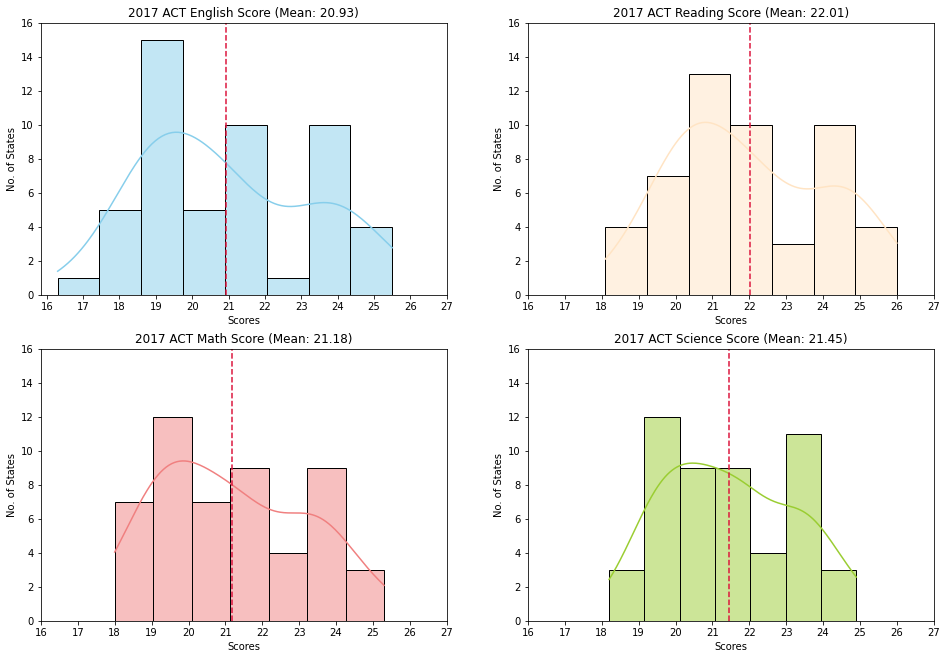

In [105]:
fig = plt.figure(figsize=(16, 11))

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)


sns.histplot(data=act_2017, x=act_2017['English'], ax=ax1, kde=True, bins=8, color='skyblue')
ax1.axvline(act_2017['English'].mean(), ls='--', color='crimson')
ax1.set_xlabel("Scores")
ax1.set_title("2017 ACT English Score (Mean: %.2f)"%act_2017['English'].mean())
ax1.set_yticks(np.arange(0, 18, 2))
ax1.set_xticks(np.arange(16, 28, 1))
ax1.set_ylabel("No. of States")

sns.histplot(data=act_2017, x=act_2017['Reading'], ax=ax2, kde=True, color='bisque')
ax2.axvline(act_2017['Reading'].mean(), ls='--', color='crimson')
ax2.set_xlabel("Scores")
ax2.set_title("2017 ACT Reading Score (Mean: %.2f)"%act_2017['Reading'].mean())
ax2.set_yticks(np.arange(0, 18, 2))
ax2.set_xticks(np.arange(16, 28, 1))
ax2.set_ylabel("No. of States")

sns.histplot(data=act_2017, x=act_2017['Math'], ax=ax3, kde=True, color='lightcoral')
ax3.axvline(act_2017['Math'].mean(), ls='--', color='crimson')
ax3.set_xlabel("Scores")
ax3.set_title("2017 ACT Math Score (Mean: %.2f)"%act_2017['Math'].mean())
ax3.set_yticks(np.arange(0, 18, 2))
ax3.set_xticks(np.arange(16, 28, 1))
ax3.set_ylabel("No. of States")

sns.histplot(data=act_2017, x=act_2017['Science'], ax=ax4, kde=True, color='yellowgreen')
ax4.axvline(act_2017['Science'].mean(), ls='--', color='crimson')
ax4.set_xlabel("Scores")
ax4.set_title("2017 ACT Science Score (Mean: %.2f)"%act_2017['Science'].mean())
ax4.set_yticks(np.arange(0, 18, 2))
ax4.set_xticks(np.arange(16, 28, 1))
ax4.set_ylabel("No. of States")


plt.savefig('./png/ACT_Subject_Scores.png')

From the above histogram plot for all 4 subjects, we can observed that none of the ACT subjects follow a normal distribution. The graphs are tending towards a bimodal distribution where there are two peaks in the distribution. This is unlike normal distribution whereby it has only 1 peak. 

When we have two peaks of data, this usually indicates that there are two different groups of students, one group is low-performing students who have not really studied for the exam or they are not prepared for the exam. Another group would be students who are very well-prepared for the exam. This usually leads to a bimodal distribution.

We could also observe that students score lower for English subject as compared to rest of the ACT subjects.

<AxesSubplot:ylabel='Frequency'>

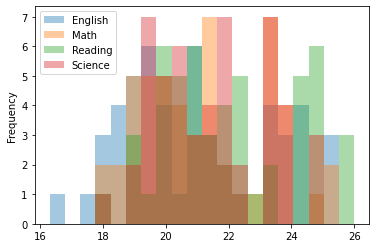

In [84]:
subjects = ['English','Math','Reading','Science']
act_subject = act_2017[subjects]
act_subject.plot.hist(bins=20, alpha=0.4)

From the combine histogram plot of all 4 subjects, we could that there is 1 state that scored particularly low for English subject which could the possible reason for pulling the English score down.

In [85]:
# ACT - Find states with lower than mean score for English - 28 States
columns_eng = ['State','Participation (2017) (ACT)','English']
act_english = act_2017[act_2017['English']<20.92].sort_values(by='English', ascending=True)
print('There are %d States that are lower than the mean score for English.'%len(act_english))
act_english[columns_eng].head()

There are 28 States that are lower than the mean score for English.


,State,Participation (2017) (ACT),English
29,Nevada,100,16.3
41,South Carolina,100,17.5
12,Hawaii,90,17.8
34,North Carolina,100,17.8
25,Mississippi,100,18.2


The 5 least scored states for English subject are Nevada, South Carolina, Hawaii, North Carolina and Mississippi.

In [99]:
# ACT - Find states with lower than mean score for Math - 35 States
columns_math = ['State','Participation (2017) (ACT)','Math']
act_math = act_2017[act_2017['Math']<22.18].sort_values(by='Math', ascending=True)
print('There are %d States that are lower than the mean score for Math.'%len(act_math))
act_math[columns_math].head()

There are 35 States that are lower than the mean score for Math.


,State,Participation (2017) (ACT),Math
29,Nevada,100,18.0
25,Mississippi,100,18.1
1,Alabama,100,18.4
41,South Carolina,100,18.6
37,Oklahoma,100,18.8


The 5 least scored states for Math subject are Nevada, Mississippi, Alabama, South Carolina and Oklahoma.

In [100]:
# ACT - Find states with lower than mean score for Reading - 28 States
columns_reading = ['State','Participation (2017) (ACT)','Reading']
act_reading = act_2017[act_2017['Reading']<22.01].sort_values(by='Reading', ascending=True)
print('There are %d States that are lower than the mean score for Reading.'%len(act_reading))
act_reading[columns_reading].head()

There are 28 States that are lower than the mean score for Reading.


,State,Participation (2017) (ACT),Reading
29,Nevada,100,18.1
25,Mississippi,100,18.8
41,South Carolina,100,19.1
12,Hawaii,90,19.2
34,North Carolina,100,19.6


The 5 least scored states for Reading subject are Nevada, Mississippi, South Carolina, Hawaii and North Carolina.

In [101]:
# ACT - Find states with lower than mean score for Science - 37 States
columns_science = ['State','Participation (2017) (ACT)','Science']
act_science = act_2017[act_2017['Science']<22.45].sort_values(by='Science', ascending=True)
print(len(act_science))
act_science[columns_science].head()

37


,State,Participation (2017) (ACT),Science
29,Nevada,100,18.2
25,Mississippi,100,18.8
41,South Carolina,100,18.9
34,North Carolina,100,19.3
12,Hawaii,90,19.3


The 5 least scored states for English subject are Nevada, Mississippi, South Carolina, North Carolina and Hawaii.

### Conclusion for ACT 

For ACT, We observe that students generally score lower for English subject as compared to other subjects. This finding enables tuition centres to have a better decision on their allocation of resources. For example, they could hire more English teacher in order to keep up with the arrangement of have more English classes as compared to other subjects. However, do note that Nevada's data might not be a good representation due to its location. It is the 9th-least densely populated state out of all the US states. Due to the low population, this might not have a good representation of the state's score. While for tuition centres who would want to allocate equal amount of classes for all ACT subjects, Nevada, Mississippi and South Carolina could be the potential states to be targeted as they are in the top 5 least scored states for all 4 subjects. 

### Data Visualisation on SAT Scores

In [89]:
sat_2017.head()

,State,Participation (2017) (SAT),Evidence-Based Reading and Writing,Math,Total (2017) (SAT),GDP Per Capita (2017)
0,Alabama,5,593,572,1165,40252.0
1,Alaska,38,547,533,1080,57278.0
2,Arizona,30,563,553,1116,43301.0
3,Arkansas,3,614,594,1208,42056.0
4,California,53,531,524,1055,58813.0


In [90]:
sat_2018.head()

,State,Participation (2018) (SAT),Evidence-Based Reading and Writing,Math,Total (2018) (SAT),GDP Per Capita (2018)
0,Alabama,6,595,571,1166,41607.0
1,Alaska,43,562,544,1106,59783.0
2,Arizona,29,577,572,1149,45299.0
3,Arkansas,5,592,576,1169,43661.0
4,California,60,540,536,1076,61509.0


In [91]:
sat_2019.head()

,State,Participation (2019) (SAT),EBRW,Math,Total (2019) (SAT),GDP Per Capita (2019)
0,Alabama,7,583,560,1143,43157.0
1,Alaska,41,556,541,1097,61639.0
2,Arizona,31,569,565,1134,47242.0
3,Arkansas,6,582,559,1141,45037.0
4,California,63,534,531,1065,64333.0


In [92]:
sat_2017 = sat_2017[sat_2017['State'].isin(sat_merged['State'])]
sat_2017.head()

,State,Participation (2017) (SAT),Evidence-Based Reading and Writing,Math,Total (2017) (SAT),GDP Per Capita (2017)
0,Alabama,5,593,572,1165,40252.0
1,Alaska,38,547,533,1080,57278.0
2,Arizona,30,563,553,1116,43301.0
3,Arkansas,3,614,594,1208,42056.0
4,California,53,531,524,1055,58813.0


In [93]:
sat_2018 = sat_2018[sat_2018['State'].isin(sat_merged['State'])]
sat_2018.head()

,State,Participation (2018) (SAT),Evidence-Based Reading and Writing,Math,Total (2018) (SAT),GDP Per Capita (2018)
0,Alabama,6,595,571,1166,41607.0
1,Alaska,43,562,544,1106,59783.0
2,Arizona,29,577,572,1149,45299.0
3,Arkansas,5,592,576,1169,43661.0
4,California,60,540,536,1076,61509.0


In [94]:
#wrong index label for sat_2019
sat_2019 = sat_2019[sat_2019['State'].isin(sat_merged['State'])]
sat_2019 = sat_2019.reset_index(drop=True)
sat_2019.head()

,State,Participation (2019) (SAT),EBRW,Math,Total (2019) (SAT),GDP Per Capita (2019)
0,Alabama,7,583,560,1143,43157.0
1,Alaska,41,556,541,1097,61639.0
2,Arizona,31,569,565,1134,47242.0
3,Arkansas,6,582,559,1141,45037.0
4,California,63,534,531,1065,64333.0


In [102]:
sat_merged['EBRW_2017']=sat_2017['Evidence-Based Reading and Writing']
sat_merged['EBRW_2018']=sat_2018['Evidence-Based Reading and Writing']
sat_merged['EBRW_2019']=sat_2019['EBRW']
sat_merged['Average_EBRW'] = round((sat_merged['EBRW_2017']
                                   +sat_merged['EBRW_2018']
                                   +sat_merged['EBRW_2019'])/3,2)
sat_merged['math_2017']=sat_2017['Math']
sat_merged['math_2018']=sat_2018['Math']
sat_merged['math_2019']=sat_2019['Math']
sat_merged['Average_math'] = round((sat_merged['math_2017']
                                   +sat_merged['math_2018']
                                   +sat_merged['math_2019'])/3,2)
sat_merged.head()

,State,Rate_2017_sat,Rate_2018_sat,Rate_2019_sat,Total_2017_sat,Total_2018_sat,Total_2019_sat,GDP_2017,GDP_2018,GDP_2019,...,Mean_Rate_SAT,Req_SAT,EBRW_2017,EBRW_2018,EBRW_2019,Average_EBRW,math_2017,math_2018,math_2019,Average_math
0,Alabama,5,6,7,1165,1166,1143,40252.0,41607.0,43157.0,...,6.0,0,593,595,583,590.33,572,571,560,567.67
1,Alaska,38,43,41,1080,1106,1097,57278.0,59783.0,61639.0,...,41.0,0,547,562,556,555.00,533,544,541,539.33
2,Arizona,30,29,31,1116,1149,1134,43301.0,45299.0,47242.0,...,30.0,0,563,577,569,569.67,553,572,565,563.33
3,Arkansas,3,5,6,1208,1169,1141,42056.0,43661.0,45037.0,...,5.0,0,614,592,582,596.00,594,576,559,576.33
4,California,53,60,63,1055,1076,1065,58813.0,61509.0,64333.0,...,59.0,0,531,540,534,535.00,524,536,531,530.33


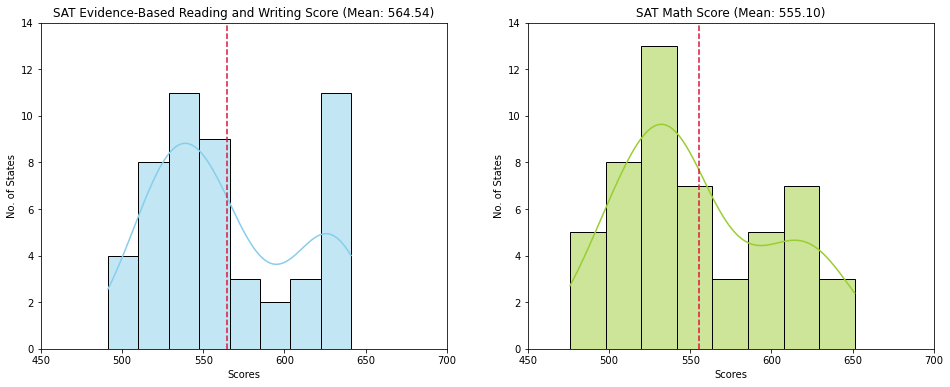

In [106]:

fig = plt.figure(figsize=(16, 6))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)


sns.histplot(data=sat_merged, x=sat_merged['Average_EBRW'], ax=ax1, kde=True, bins=8, color='skyblue')
ax1.axvline(sat_merged['Average_EBRW'].mean(), ls='--', color='crimson')
ax1.set_xlabel("Scores")
ax1.set_title("SAT Evidence-Based Reading and Writing Score (Mean: %.2f)"%sat_merged['Average_EBRW'].mean())
ax1.set_yticks(np.arange(0, 16, 2))
ax1.set_xticks(np.arange(450, 701, 50))
ax1.set_ylabel("No. of States")

sns.histplot(data=sat_merged, x=sat_merged['Average_math'], ax=ax2, kde=True, bins=8, color='yellowgreen')
ax2.axvline(sat_merged['Average_math'].mean(), ls='--', color='crimson')
ax2.set_xlabel("Scores")
ax2.set_title("SAT Math Score (Mean: %.2f)"%sat_merged['Average_math'].mean())
ax2.set_yticks(np.arange(0, 16, 2))
ax2.set_xticks(np.arange(450, 701, 50))
ax2.set_ylabel("No. of States")


plt.savefig('./png/SAT_Subject_Scores.png')

From the above histogram, the bimodal distribution are more obvious as compared to ACT subject histogram. We can see that students generally scores lower for Math subject as compared to Evidence-Based Reading and Writing (EBRW).

In [103]:
#find the states with lower sat EBRW score - 31 States
sat_columns_EBRW = ['State','Rate_2017_sat', 'Rate_2018_sat', 'Rate_2019_sat', 'Mean_Rate_SAT','Average_EBRW']
sat_EBRW = sat_merged[sat_merged['Average_EBRW']<564.54].sort_values(by=['Mean_Rate_SAT'], ascending=False)
print(len(sat_EBRW)) 
sat_EBRW[sat_columns_EBRW].head()

31


,State,Rate_2017_sat,Rate_2018_sat,Rate_2019_sat,Mean_Rate_SAT,Average_EBRW
22,Michigan,100,100,100,100.0,509.00
7,Delaware,100,100,100,100.0,502.33
6,Connecticut,100,100,100,100.0,531.33
12,Idaho,93,100,100,98.0,508.67
19,Maine,95,99,99,98.0,512.33


The 5 least scored states for EBRW subject are Michigan, Delaware, Connecticut, Idaho and Maine.

In [104]:
#find states with lower than sat Math mean score - 33 States
sat_columns_math = ['State', 'Rate_2017_sat', 'Rate_2018_sat', 'Rate_2019_sat','Mean_Rate_SAT','Average_math']
sat_math = sat_merged[sat_merged['Average_math']<555.10].sort_values(by='Average_math', ascending=True)
print(len(sat_math)) 
sat_math[sat_columns_math].head()

31


,State,Rate_2017_sat,Rate_2018_sat,Rate_2019_sat,Mean_Rate_SAT,Average_math
8,District of Columbia,100,92,94,95.0,476.00
7,Delaware,100,100,100,100.0,490.00
48,West Virginia,14,28,99,47.0,491.33
12,Idaho,93,100,100,98.0,491.33
22,Michigan,100,100,100,100.0,496.67


The 5 least scored states for Math subject are District of Columbia, Delaware, West Virginia, Idaho and Michigan.

### Conclusion for SAT 
For SAT, students generally score lower for Math than EBRW. Thus, for tuition centres who want to provide tuition for SAT, they can allocate more resources for Math subject as compared to EBRW. 

It is interesting to see how West Virginia's SAT participation rate has been low for 2017 and 2018, this is mainly due to West Virginia only adopting SAT as their statewide standardised test in spring 2018. Therefore, West Virginia Math score may not be a good representation of its state Math score.

With our findings, we can conclude for tuition centres which want to have a more well rounded tuition for both subjects, District of Comlumbia, Delaware, Idaho and Michigan seems to be the potential states to start off with as they are the few states that scored the least for both subjects.

## 4. Additional Recommendations

In the analysis of the targeted states based on ACT and SAT subjects, we would recommend private tuition business to offer tuitions for a variety of subjects. This arrangement will take care of students who would want to have tuition for either a combination of subjects or just one subject. Tuition centres can also offer attractive tuition packages to attract students to sign up to their tuition packages. This allows a more well-rounded tuition centre, taking care of students with different needs and able to maximise their profit. Therefore, our recommendations are based on the least scored states for all subjects, be in ACT or SAT.

In order to further substantiate our conclusion, it is recommended to analyse the GDP per state and population for each state. GDP per state reflects the purchasing power of each state and this analyse will give private tuition business a rough gauge on their profit and how to price their tuition lessons or package such that it is competitive. Population is also another criteria to be considered, this allows private tuition businesses to gauge the number of potential student intakes and profit. 

Other possible datas to be analysed could be age distribution, government spending on education and test suitability based on students' capability for private tuition businesses to make better decision.